A binary tree (or B-tree) can be used to store strings and retrieve them in logarithmic time.

It supports the following operations:
* insert a string;
* search a string;
* return the number of strings;
* print all strings stored in the B-tree.

# Implementation

We implement two classes, one to represent a node of a binary search tree, the second to represent the tree.  Only the latter will be used by the user of the data structure, the `BtreeNode` class is only for intermal usage.

In [1]:
class BtreeNode:
    
    def __init__(self, string):
        self._string = string
        self._lt, self._gt = None, None

    def _insert(self, string):
        if string == self._string:
            return
        if string < self._string:
            if self._lt is None:
                self._lt = BtreeNode(string)
            else:
                self._lt._insert(string)
        elif string > self._string:
            if self._gt is None:
                self._gt = BtreeNode(string)
            else:
                self._gt._insert(string)
    
    def _search(self, string):
        if string == self._string:
            return True
        elif string < self._string:
            return self._lt is not None and self._lt._search(string)
        else:
            return self._gt is not None and self._gt._search(string)
    
    def _all_strings(self):
        strings = [self._string]
        if self._lt is not None:
            strings.extend(self._lt._all_strings())
        if self._gt is not None:
            strings.extend(self._gt._all_strings())
        return strings

    def __len__(self):
        length = 1
        if self._lt is not None:
            length += len(self._lt)
        if self._gt is not None:
            length += len(self._gt)
        return length

    def _to_string(self, indent=''):
        repr_str = indent + repr(self)
        if self._lt is not None:
            repr_str += '\n' + self._lt._to_string(indent + '  ')
        if self._gt is not None:
            repr_str += '\n' + self._gt._to_string(indent + '  ')
        return repr_str

    def __repr__(self):
        return self._string

In [2]:
class Btree:
    
    def __init__(self):
        self._root = None
        
    def insert(self, string):
        if self._root is None:
            self._root = BtreeNode(string)
        else:
            self._root._insert(string)

    def search(self, string):
        if self._root is None:
            return False
        else:
            return self._root._search(string)
        
    def all_strings(self):
        if self._root is None:
            return []
        else:
            return self._root._all_strings()
        
    def __len__(self):
        if self._root is None:
            return 0
        else:
            return len(self._root)
    
    def __repr__(self):
        if self._root is None:
            return 'empty tree'
        else:
            return self._root._to_string('')

# Example usage

Create an empty B-tree.

In [3]:
btree = Btree()

Display it in its current state.

In [4]:
print(btree)

empty tree


Verify that it has no strings stored.

In [5]:
len(btree)

0

Insert the string`'abc'`.

In [6]:
btree.insert('abc')

Verify that the string now encodes a single string.

In [7]:
len(btree)

1

Insert a second string `'aqc`'.

In [8]:
btree.insert('aqc')

Now the tree has two elements.

In [9]:
len(btree)

2

In [10]:
print(btree)

abc
  aqc


Add a third string `'aaq'`.

In [11]:
btree.insert('aaq')

In [12]:
print(btree)

abc
  aaq
  aqc


Search for a string that is not in the B-tree.

In [13]:
btree.search('aac')

False

Search for a string that is inserted into the B-tree.

In [14]:
btree.search('aaq')

True

List all strings in the B-tree.

In [15]:
btree.all_strings()

['abc', 'aaq', 'aqc']

# Testing

Create a new B-tree and insert some words.

In [16]:
btree = Btree()
with open('data/search_trees/insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    btree.insert(word)
unique_words = set(words)

Verify the length of the data stucture.

In [17]:
assert len(btree) == len(unique_words), \
       f'{len(btree)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found.

In [18]:
for word in unique_words:
    assert btree.search(word), f'{word} not found'

Check that words in the file `data/search_trees/not_insert_words.txt` can not be found in the tree.

In [19]:
with open('data/search_trees/not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not btree.search(word), f'{word} should not be found'

Check that all strings are returned.

In [20]:
all_strings = btree.all_strings()
assert len(all_strings) == len(unique_words), \
       f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

If no output was generated, all tests have passed.

# Performance

To assess the performance, i.e., the time it takes to insert a new string or search the binary tree as a function of the tree's size, we need a large dataset.  This is provided in `data/search_trees/corncob_lowercase.txt`.  This file contains over 58,000 English words, all lower case.

In [21]:
with open('data/search_trees/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]

In [22]:
len(words)

58110

The words are alphabetically ordered.

In [23]:
words[:20]

['aardvark',
 'aardwolf',
 'aaron',
 'aback',
 'abacus',
 'abaft',
 'abalone',
 'abandon',
 'abandoned',
 'abandonment',
 'abandons',
 'abase',
 'abased',
 'abasement',
 'abash',
 'abashed',
 'abate',
 'abated',
 'abatement',
 'abates']

We will select random samples of increasing sizes from the list.

In [24]:
import random
import time

In [25]:
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]

In [26]:
samples = [
    random.sample(words, k=size) for size in sizes
]

We can now time how long it takes to insert words into a B-tree of various sizes.  First we build the B-tree based on the sample, and then we insert words.

In [27]:
nr_runs = 10
times = {}
insert_sample = random.sample(words, k=20)
for sample in samples:
    btree = Btree()
    for word in sample:
        btree.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in insert_sample:
            btree.insert(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.0169227,
 500: 0.0212762,
 1000: 0.0229081,
 5000: 0.0456779,
 10000: 0.028248,
 20000: 0.0297672,
 30000: 0.0339069,
 40000: 0.034217,
 50000: 0.0336}

In [28]:
import matplotlib.pyplot as plt

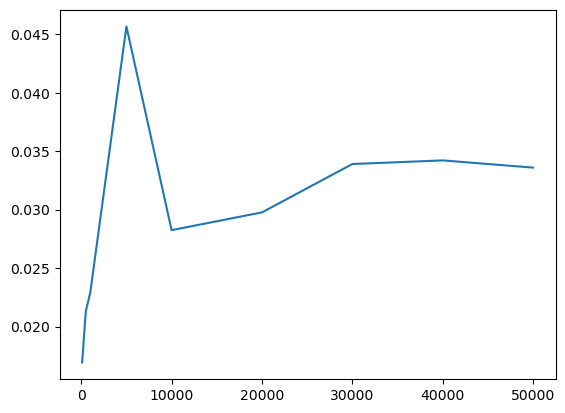

In [29]:
plt.plot(times.keys(), times.values());

We can do the same for searching words in a B-tree of various sizes.  First we build the B-tree based on the sample, and then we search words.

In [30]:
nr_runs = 10
times = {}
search_sample = random.sample(words, k=20)
for sample in samples:
    btree = Btree()
    for word in sample:
        btree.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_sample:
            btree.search(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.0143018,
 500: 0.0198965,
 1000: 0.0204134,
 5000: 0.0295416,
 10000: 0.024304,
 20000: 0.027661,
 30000: 0.0284209,
 40000: 0.0322838,
 50000: 0.0277159}

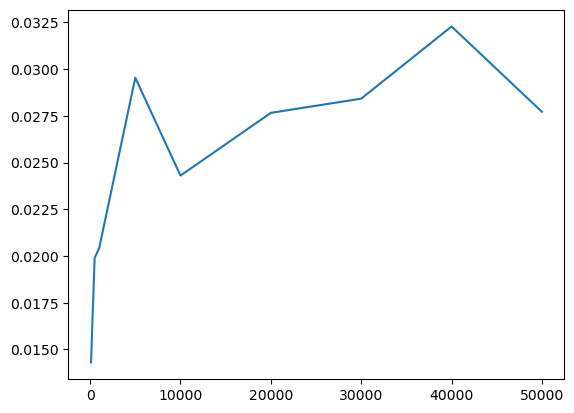

In [31]:
plt.plot(times.keys(), times.values());

In [32]:
nr_runs = 10
times = {}
for sample in samples:
    btree = Btree()
    for word in sample:
        btree.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        search_sample = random.sample(sample, k=20)
        start_time = time.time_ns()
        for word in search_sample:
            btree.search(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.0124974,
 500: 0.0155676,
 1000: 0.0282134,
 5000: 0.0260871,
 10000: 0.0263266,
 20000: 0.0359154,
 30000: 0.0506863,
 40000: 0.0366609,
 50000: 0.0390104}

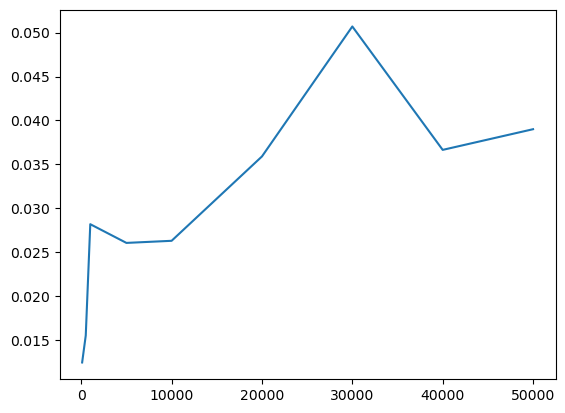

In [33]:
plt.plot(times.keys(), times.values());

# Comparison with `set`

How does it stack up to a Python `set`?

In [37]:
with open('data/search_trees/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]
random.shuffle(words)

In [38]:
hold_out_sample = words[-100:]
insert_sample = words[:-100]

In [40]:
%%timeit
word_set = set()
for word in insert_sample:
    word_set.add(word)

3.35 ms ± 90.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%%timeit
word_btree = Btree()
for word in insert_sample:
    word_btree.insert(word)

136 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
word_set = set()
for word in insert_sample:
    word_set.add(word)

In [44]:
%%timeit
total = 0
for word in hold_out_sample:
    if word in word_set:
        total += 1

1.67 µs ± 6.42 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [45]:
word_btree = Btree()
for word in insert_sample:
    word_btree.insert(word)

In [46]:
%%timeit
total = 0
for word in hold_out_sample:
    if word_btree.search(word):
        total += 1

176 µs ± 156 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


It is clear that Python sets outperform our B-tree implementation.